(PS)I tried a ton of things so this jupyter notebook is a mess but I have marked the most prominent code with ----around the text----. I hope you are able to read it.

---------------DATA INSPECTION CLEANING AND FEATURE SELECTION--------------------------------------------------------------------------

In [119]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import confusion_matrix
import matplotlib.mlab as mlab

df = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/pharma_data/Training_set_begs.csv')

In [120]:
df.shape

(23097, 18)

In [121]:
df.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
0,22374,8,3333,DX6,56,18.479385,YES,URBAN,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0
1,18164,5,5740,DX2,36,22.945566,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2,6283,23,10446,DX6,48,27.510027,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,5339,51,12011,DX1,5,19.130976,NO,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
4,33012,0,12513,NaN,128,1.348400,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1


In [122]:
len(df.ID_Patient_Care_Situation.unique())

23097

In [123]:
len(df.Diagnosed_Condition.unique())

53

In [124]:
df.isnull().sum()

ID_Patient_Care_Situation       0
Diagnosed_Condition             0
Patient_ID                      0
Treated_with_drugs             13
Patient_Age                     0
Patient_Body_Mass_Index         0
Patient_Smoker                  0
Patient_Rural_Urban             0
Patient_mental_condition        0
A                            1235
B                            1235
C                            1235
D                            1235
E                            1235
F                            1235
Z                            1235
Number_of_prev_cond          1235
Survived_1_year                 0
dtype: int64

In [125]:
df.Treated_with_drugs.value_counts()

DX6                     8606
DX5                     1909
DX2                     1904
DX1                     1835
DX3                     1830
DX4                     1792
DX1 DX2                  448
DX3 DX4                  448
DX1 DX3                  424
DX4 DX5                  423
DX2 DX4                  419
DX1 DX4                  408
DX3 DX5                  407
DX1 DX5                  402
DX2 DX5                  400
DX2 DX3                  398
DX1 DX2 DX5              103
DX1 DX3 DX5              101
DX1 DX2 DX4               99
DX3 DX4 DX5               96
DX1 DX2 DX3               95
DX2 DX3 DX5               91
DX1 DX3 DX4               90
DX2 DX3 DX4               87
DX2 DX4 DX5               84
DX1 DX4 DX5               80
DX1 DX2 DX3 DX4           24
DX1 DX3 DX4 DX5           24
DX2 DX3 DX4 DX5           22
DX1 DX2 DX4 DX5           18
DX1 DX2 DX3 DX5           14
DX1 DX2 DX3 DX4 DX5        3
Name: Treated_with_drugs, dtype: int64

In [126]:
df.describe()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Patient_Age,Patient_Body_Mass_Index,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
count,23097.000000,23097.000000,23097.000000,23097.000000,23097.000000,21862.000000,21862.000000,21862.000000,21862.000000,21862.000000,21862.000000,21862.000000,21862.000000,23097.000000
mean,16545.712041,26.413127,6261.280772,33.209768,23.454820,0.897905,0.136355,0.185070,0.083615,0.393239,0.053700,0.000595,1.750480,0.632247
std,9532.263503,15.030865,3595.990620,19.549882,3.807661,0.302780,0.343173,0.388363,0.276817,0.488480,0.225431,0.024379,0.770311,0.482204
min,2.000000,0.000000,1.000000,0.000000,1.089300,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,8280.000000,13.000000,3181.000000,16.000000,20.205550,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,16597.000000,26.000000,6242.000000,33.000000,23.386199,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000
75%,24825.000000,39.000000,9363.000000,50.000000,26.788154,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2.000000,1.000000
max,33014.000000,52.000000,12515.000000,149.000000,29.999579,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,1.000000


In [127]:
df.Treated_with_drugs.mode()

0    DX6
dtype: object

In [128]:
df['Treated_with_drugs'].fillna(df['Treated_with_drugs'].mode()[0], inplace=True)

In [129]:
#drugs={'DX6':0,'DX5 ':1,'DX2 ':2,'DX1 ':3,'DX3 ':4,'DX4 ':5,'DX3 DX4 ':6,'DX1 DX2 ':8,'DX1 DX3 ':9,'DX4 DX5 ':10,'DX2 DX4 ':11,'DX1 DX4 ':12,'DX3 DX5 ':13,'DX1 DX5 ':14,'DX2 DX5 ':15,'DX2 DX3 ':16,'DX1 DX2 DX5 ':17,'DX1 DX3 DX5 ':18,'DX1 DX2 DX4 ':19,'DX3 DX4 DX5 ':20,'DX1 DX2 DX3 ':21,'DX2 DX3 DX5 ':22,'DX1 DX3 DX4 ':23,'DX2 DX3 DX4 ':24,'DX2 DX4 DX5 ':25,'DX1 DX4 DX5 ':26,'DX1 DX2 DX3 DX4 ':27,'DX1 DX3 DX4 DX5 ':28,'DX2 DX3 DX4 DX5 ':29,'DX1 DX2 DX4 DX5 ':30,'DX1 DX2 DX3 DX5 ':31,'DX1 DX2 DX3 DX4 DX5 ':32}
#df.Treated_with_drugs = [drugs[val] for val in df.Treated_with_drugs] 

--------------------------Dummies for Treated with Drugs--------------------------------------------------------------------------------------------------------------------------

In [130]:
df_Treated_with_drugs = pd.get_dummies(df['Treated_with_drugs'])
#Concat new columns to original dataframe 
df= pd.concat([df, df_Treated_with_drugs], axis=1)

In [131]:
df.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,...,DX2 DX4 DX5,DX2 DX5,DX3,DX3 DX4,DX3 DX4 DX5,DX3 DX5,DX4,DX4 DX5,DX5,DX6
0,22374,8,3333,DX6,56,18.479385,YES,URBAN,Stable,1.0,...,0,0,0,0,0,0,0,0,0,1
1,18164,5,5740,DX2,36,22.945566,YES,RURAL,Stable,1.0,...,0,0,0,0,0,0,0,0,0,0
2,6283,23,10446,DX6,48,27.510027,YES,RURAL,Stable,1.0,...,0,0,0,0,0,0,0,0,0,1
3,5339,51,12011,DX1,5,19.130976,NO,URBAN,Stable,1.0,...,0,0,0,0,0,0,0,0,0,0
4,33012,0,12513,DX6,128,1.348400,Cannot say,RURAL,Stable,0.0,...,0,0,0,0,0,0,0,0,0,1


--------------------------Restoring clustered value to Indivudal values--------------------------------------------------------------------------------------------------------------------------

In [132]:
len(df['DX1 '][df['DX1 ']==1])

1835

In [133]:
df['DX1 ']=df['DX1 ']+df['DX1 DX2 ']+df['DX1 DX3 ']+df['DX1 DX4 ']+df['DX1 DX5 ']+df['DX1 DX2 DX5 ']+df['DX1 DX3 DX5 ']+df['DX1 DX2 DX4 ']+df['DX1 DX2 DX3 ']+df['DX1 DX3 DX4 ']+df['DX1 DX4 DX5 ']+df['DX1 DX2 DX3 DX4 ']+df['DX1 DX3 DX4 DX5 ']+df['DX1 DX2 DX4 DX5 ']+df['DX1 DX2 DX3 DX5 ']+df['DX1 DX2 DX3 DX4 DX5 ']

In [134]:
len(df['DX1 '][df['DX1 ']==1])

4168

In [135]:
df['DX2 ']=df['DX2 ']+df['DX1 DX2 ']+df['DX2 DX4 ']+df['DX2 DX5 ']+df['DX2 DX3 ']+df['DX1 DX2 DX5 ']+df['DX1 DX2 DX4 ']+df['DX1 DX2 DX3 ']+df['DX2 DX3 DX5 ']+df['DX2 DX3 DX4 ']+df['DX2 DX4 DX5 ']+df['DX1 DX2 DX3 DX4 ']+df['DX2 DX3 DX4 DX5 ']+df['DX1 DX2 DX4 DX5 ']+df['DX1 DX2 DX3 DX5 ']+df['DX1 DX2 DX3 DX4 DX5 ']

In [136]:
df['DX3 ']=df['DX3 ']+df['DX3 DX4 ']+df['DX1 DX3 ']+df['DX3 DX5 ']+df['DX2 DX3 ']+df['DX1 DX3 DX5 ']+df['DX3 DX4 DX5 ']+df['DX1 DX2 DX3 ']+df['DX2 DX3 DX5 ']+df['DX1 DX3 DX4 ']+df['DX2 DX3 DX4 ']+df['DX1 DX2 DX3 DX4 ']+df['DX1 DX3 DX4 DX5 ']+df['DX2 DX3 DX4 DX5 ']+df['DX1 DX2 DX3 DX5 ']+df['DX1 DX2 DX3 DX4 DX5 ']

In [137]:
df['DX4 ']=df['DX4 ']+df['DX3 DX4 ']+df['DX4 DX5 ']+df['DX2 DX4 ']+df['DX1 DX4 ']+df['DX1 DX2 DX4 ']+df['DX3 DX4 DX5 ']+df['DX1 DX3 DX4 ']+df['DX2 DX3 DX4 ']+df['DX2 DX4 DX5 ']+df['DX1 DX4 DX5 ']+df['DX1 DX2 DX3 DX4 ']+df['DX1 DX3 DX4 DX5 ']+df['DX2 DX3 DX4 DX5 ']+df['DX1 DX2 DX4 DX5 ']+df['DX1 DX2 DX3 DX4 DX5 ']

In [138]:
df['DX5 ']=df['DX5 ']+df['DX4 DX5 ']+df['DX3 DX5 ']+df['DX1 DX5 ']+df['DX2 DX5 ']+df['DX1 DX2 DX5 ']+df['DX1 DX3 DX5 ']+df['DX3 DX4 DX5 ']+df['DX2 DX3 DX5 ']+df['DX2 DX4 DX5 ']+df['DX1 DX4 DX5 ']+df['DX1 DX3 DX4 DX5 ']+df['DX2 DX3 DX4 DX5 ']+df['DX1 DX2 DX4 DX5 ']+df['DX1 DX2 DX3 DX5 ']+df['DX1 DX2 DX3 DX4 DX5 ']

In [139]:
df=df.drop(['DX3 DX4 ','DX1 DX2 ','DX1 DX3 ','DX4 DX5 ','DX2 DX4 ','DX1 DX4 ','DX3 DX5 ','DX1 DX5 ','DX2 DX5 ','DX2 DX3 ','DX1 DX2 DX5 ','DX1 DX3 DX5 ','DX1 DX2 DX4 ','DX3 DX4 DX5 ','DX1 DX2 DX3 ','DX2 DX3 DX5 ','DX1 DX3 DX4 ','DX2 DX3 DX4 ','DX2 DX4 DX5 ','DX1 DX4 DX5 ','DX1 DX2 DX3 DX4 ','DX1 DX3 DX4 DX5 ','DX2 DX3 DX4 DX5 ','DX1 DX2 DX4 DX5 ','DX1 DX2 DX3 DX5 ','DX1 DX2 DX3 DX4 DX5 '],axis=1)

In [140]:
df.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,...,F,Z,Number_of_prev_cond,Survived_1_year,DX1,DX2,DX3,DX4,DX5,DX6
0,22374,8,3333,DX6,56,18.479385,YES,URBAN,Stable,1.0,...,0.0,0.0,2.0,0,0,0,0,0,0,1
1,18164,5,5740,DX2,36,22.945566,YES,RURAL,Stable,1.0,...,0.0,0.0,1.0,1,0,1,0,0,0,0
2,6283,23,10446,DX6,48,27.510027,YES,RURAL,Stable,1.0,...,0.0,0.0,1.0,0,0,0,0,0,0,1
3,5339,51,12011,DX1,5,19.130976,NO,URBAN,Stable,1.0,...,0.0,0.0,1.0,1,1,0,0,0,0,0
4,33012,0,12513,DX6,128,1.348400,Cannot say,RURAL,Stable,0.0,...,0.0,1.0,1.0,1,0,0,0,0,0,1


--------------------------Dummies for patient smoker--------------------------------------------------------------------------------------------------------------------------

In [141]:
df.Patient_Smoker.value_counts()

NO            13246
YES            9838
Cannot say       13
Name: Patient_Smoker, dtype: int64

In [142]:
# Create dummy variables for 2 columns
df_Patient_Smoker = pd.get_dummies(df['Patient_Smoker'],prefix='Smoker')
#Concat new columns to original dataframe 
df= pd.concat([df, df_Patient_Smoker], axis=1)

In [143]:
df.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,...,Survived_1_year,DX1,DX2,DX3,DX4,DX5,DX6,Smoker_Cannot say,Smoker_NO,Smoker_YES
0,22374,8,3333,DX6,56,18.479385,YES,URBAN,Stable,1.0,...,0,0,0,0,0,0,1,0,0,1
1,18164,5,5740,DX2,36,22.945566,YES,RURAL,Stable,1.0,...,1,0,1,0,0,0,0,0,0,1
2,6283,23,10446,DX6,48,27.510027,YES,RURAL,Stable,1.0,...,0,0,0,0,0,0,1,0,0,1
3,5339,51,12011,DX1,5,19.130976,NO,URBAN,Stable,1.0,...,1,1,0,0,0,0,0,0,1,0
4,33012,0,12513,DX6,128,1.348400,Cannot say,RURAL,Stable,0.0,...,1,0,0,0,0,0,1,1,0,0


--------------------------Dummies for Rural Urban--------------------------------------------------------------------------------------------------------------------------

In [144]:
df.Patient_Rural_Urban.value_counts()

RURAL    16134
URBAN     6963
Name: Patient_Rural_Urban, dtype: int64

In [145]:
# Create dummy variables for 2 columns
df_Patient_Rural_Urban = pd.get_dummies(df['Patient_Rural_Urban'])
#Concat new columns to original dataframe 
df= pd.concat([df, df_Patient_Rural_Urban], axis=1)

In [146]:
df.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,...,DX2,DX3,DX4,DX5,DX6,Smoker_Cannot say,Smoker_NO,Smoker_YES,RURAL,URBAN
0,22374,8,3333,DX6,56,18.479385,YES,URBAN,Stable,1.0,...,0,0,0,0,1,0,0,1,0,1
1,18164,5,5740,DX2,36,22.945566,YES,RURAL,Stable,1.0,...,1,0,0,0,0,0,0,1,1,0
2,6283,23,10446,DX6,48,27.510027,YES,RURAL,Stable,1.0,...,0,0,0,0,1,0,0,1,1,0
3,5339,51,12011,DX1,5,19.130976,NO,URBAN,Stable,1.0,...,0,0,0,0,0,0,1,0,0,1
4,33012,0,12513,DX6,128,1.348400,Cannot say,RURAL,Stable,0.0,...,0,0,0,0,1,1,0,0,1,0


--------------------------Only one value So ignored--------------------------------------------------------------------------------------------------------------------------

In [147]:
df.Patient_mental_condition.value_counts()

Stable    23097
Name: Patient_mental_condition, dtype: int64

In [148]:
print("A:",df.A.mode(),"\n","B:",df.B.mode(),"\n","C:",df.C.mode(),"\n","D:",df.D.mode(),"\n","E:",df.E.mode(),"\n",
      "F:",df.F.mode(),"\n","Z:",df.Z.mode(),"\n")

A: 0    1.0
dtype: float64 
 B: 0    0.0
dtype: float64 
 C: 0    0.0
dtype: float64 
 D: 0    0.0
dtype: float64 
 E: 0    0.0
dtype: float64 
 F: 0    0.0
dtype: float64 
 Z: 0    0.0
dtype: float64 



In [149]:
df['A'].fillna(1.0, inplace=True)
df['B'].fillna(0.0, inplace=True)
df['C'].fillna(0.0, inplace=True)
df['D'].fillna(0.0, inplace=True)
df['E'].fillna(0.0, inplace=True)
df['F'].fillna(0.0, inplace=True)
df['Z'].fillna(0.0, inplace=True)


In [150]:
df['Number_of_prev_cond'].fillna(df['Number_of_prev_cond'].mode()[0], inplace=True)

In [151]:
df[df.Patient_Age>70]

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,...,DX2,DX3,DX4,DX5,DX6,Smoker_Cannot say,Smoker_NO,Smoker_YES,RURAL,URBAN
4,33012,0,12513,DX6,128,1.3484,Cannot say,RURAL,Stable,0.0,...,0,0,0,0,1,1,0,0,1,0
218,33008,0,12509,DX6,112,1.2925,Cannot say,RURAL,Stable,0.0,...,0,0,0,0,1,1,0,0,1,0
2540,33014,0,12515,DX6,149,1.7784,Cannot say,RURAL,Stable,0.0,...,0,0,0,0,1,1,0,0,1,0
2711,33004,0,12505,DX6,123,1.9290,Cannot say,RURAL,Stable,0.0,...,0,0,0,0,1,1,0,0,1,0
4308,33001,0,12502,DX6,114,1.6239,Cannot say,RURAL,Stable,0.0,...,0,0,0,0,1,1,0,0,1,0
4887,33011,0,12512,DX6,132,1.9896,Cannot say,RURAL,Stable,0.0,...,0,0,0,0,1,1,0,0,1,0
6308,33010,0,12511,DX6,142,1.5701,Cannot say,RURAL,Stable,0.0,...,0,0,0,0,1,1,0,0,1,0
10388,33006,0,12507,DX6,138,1.3745,Cannot say,RURAL,Stable,0.0,...,0,0,0,0,1,1,0,0,1,0
10663,33009,0,12510,DX6,142,1.1450,Cannot say,RURAL,Stable,0.0,...,0,0,0,0,1,1,0,0,1,0
12782,33000,0,12501,DX6,112,1.5465,Cannot say,RURAL,Stable,0.0,...,0,0,0,0,1,1,0,0,1,0


In [152]:
df['Patient_Age'].min()

0

In [153]:
df['Patient_Age'].max()

149

In [154]:
#  Tried grouping did not work at all
# df.loc[df.Patient_Age<=14,'Patient_Age']=0
# df.loc[(df.Patient_Age>14) & (df.Patient_Age<=28),'Patient_Age']=1
# df.loc[(df.Patient_Age>28) & (df.Patient_Age<=42),'Patient_Age']=2
# df.loc[(df.Patient_Age>42) & (df.Patient_Age<=56),'Patient_Age']=3
# df.loc[(df.Patient_Age>56) & (df.Patient_Age<=70),'Patient_Age']=4
# df.loc[(df.Patient_Age>70),'Patient_Age']=5

In [155]:
df.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,...,DX2,DX3,DX4,DX5,DX6,Smoker_Cannot say,Smoker_NO,Smoker_YES,RURAL,URBAN
0,22374,8,3333,DX6,56,18.479385,YES,URBAN,Stable,1.0,...,0,0,0,0,1,0,0,1,0,1
1,18164,5,5740,DX2,36,22.945566,YES,RURAL,Stable,1.0,...,1,0,0,0,0,0,0,1,1,0
2,6283,23,10446,DX6,48,27.510027,YES,RURAL,Stable,1.0,...,0,0,0,0,1,0,0,1,1,0
3,5339,51,12011,DX1,5,19.130976,NO,URBAN,Stable,1.0,...,0,0,0,0,0,0,1,0,0,1
4,33012,0,12513,DX6,128,1.348400,Cannot say,RURAL,Stable,0.0,...,0,0,0,0,1,1,0,0,1,0


--------------------------Dropping original Columns and Train Test split--------------------------------------------------------------------------------------------------------------------------

In [156]:
df=df.drop(['Treated_with_drugs','Patient_Smoker','Patient_Rural_Urban'],axis=1)

In [157]:
x=df.drop(['ID_Patient_Care_Situation','Patient_ID','Patient_mental_condition','Survived_1_year'],axis=1)
y=df['Survived_1_year']
x.head()

,Diagnosed_Condition,Patient_Age,Patient_Body_Mass_Index,A,B,C,D,E,F,Z,...,DX2,DX3,DX4,DX5,DX6,Smoker_Cannot say,Smoker_NO,Smoker_YES,RURAL,URBAN
0,8,56,18.479385,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0,0,0,0,1,0,0,1,0,1
1,5,36,22.945566,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,0,1,1,0
2,23,48,27.510027,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,1,0,0,1,1,0
3,51,5,19.130976,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,1
4,0,128,1.348400,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0,0,0,0,1,1,0,0,1,0


In [158]:
x.isnull().sum()

Diagnosed_Condition        0
Patient_Age                0
Patient_Body_Mass_Index    0
A                          0
B                          0
C                          0
D                          0
E                          0
F                          0
Z                          0
Number_of_prev_cond        0
DX1                        0
DX2                        0
DX3                        0
DX4                        0
DX5                        0
DX6                        0
Smoker_Cannot say          0
Smoker_NO                  0
Smoker_YES                 0
RURAL                      0
URBAN                      0
dtype: int64

In [159]:
import sklearn
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=92)

-------------ENDS HERE PLEASE SCROLL DOWN TO FIND THE MAIN MODEL------------------------------------------------------------------------

Tried LogisticRegression

In [160]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(x_train,y_train)
y_pred=logreg.predict(x_test)
y_pr=logreg.predict(x_train)

d:\python\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [490]:
sklearn.metrics.accuracy_score(y_pr,y_train)

0.7304915381505227

In [491]:
sklearn.metrics.accuracy_score(y_test,y_pred)

0.7291630566626235

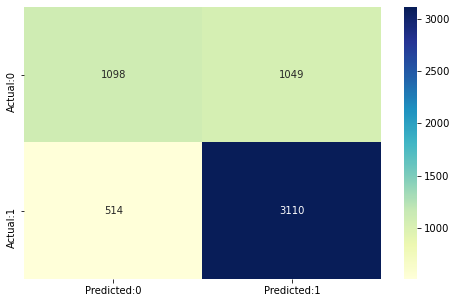

In [492]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sn.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [437]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(min_samples_split=3,n_estimators=125,max_depth=11,random_state=1)
rfc.fit(x_train,y_train)
y_pred_rfc_proba=rfc.predict_proba(x_test)

In [438]:
threshold = 0.494
y_pred_rfc = (y_pred_rfc_proba [:,1] >= threshold).astype('int')

In [338]:
sklearn.metrics.accuracy_score(y_test,y_pred_rfc)

0.8113493610569634

In [339]:
sklearn.metrics.f1_score(y_test,y_pred_rfc)

0.8563417450107208

Tried Random Forest(max score=85.99)

        GridSearchCV

In [42]:
criterion = ['gini', 'entropy']        # what criteria to consider

n_estimators = [100, 200, 300]       # Number of trees in random forest

max_features = ['auto', 'sqrt']       # Number of features to consider at every split

max_depth = [10, 20]      # Maximum number of levels in tree. Hope you remember linspace function from numpy session

max_depth.append(None)     # also appendin 'None' in max_depth i.e. no maximum depth to be considered.

params = {'criterion': criterion,
          'n_estimators': n_estimators,
          'max_features': max_features,
          'max_depth': max_depth}
rfc_best=RandomForestClassifier()

In [43]:
from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(rfc_best, param_grid=params, n_jobs=2)

---------------------Takes 10-15 minutes------------------------

In [95]:
gs.fit(x_train, y_train)

KeyboardInterrupt: 

In [ ]:
gs.best_params_

In [ ]:
gs.best_score_

In [439]:
rfc_best=RandomForestClassifier(criterion="entropy",min_samples_split=3,max_depth=13,max_features='sqrt',n_estimators=295,random_state=123,min_samples_leaf=3,verbose=0,
                       warm_start=False, max_leaf_nodes=None,min_impurity_decrease=0.0, min_impurity_split=None)
rfc_best.fit(x_train,y_train)
y_pred_rfc_best=rfc_best.predict(x_test)
y_pred_train_best=rfc_best.predict(x_train)

In [440]:
sklearn.metrics.f1_score(y_test,y_pred_rfc_best)

0.8679369250985546

In [441]:
sklearn.metrics.f1_score(y_train,y_pred_train_best)

0.9089108093606835

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred_rfc)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sn.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [ ]:
grid_search = {
    'criterion': ['entropy'],
    'max_depth': [13],
    'max_features': [gs.best_params_['max_features']],
    'min_samples_leaf': [1,3,5,7],
    'min_samples_split': [1,3,5,7],
    'n_estimators': [295 - 150, 
                     295 - 100, 
                     295, 
                     295+ 100, 
                     295+ 150]
}

clf_final = RandomForestClassifier()
model = GridSearchCV(estimator = clf_final, param_grid = grid_search, 
                               cv = 4, verbose= 5, n_jobs = -1)
model.fit(x_train,y_train)



In [72]:
predictionforest = model.best_estimator_.predict(x_test)
sklearn.metrics.f1_score(y_test,predictionforest)

0.867961804412249

In [56]:
model.best_params_

NameError: name 'model' is not defined

In [153]:
rfc_best2=RandomForestClassifier(criterion="entropy",min_samples_split=5,max_depth=13,max_features='auto',n_estimators=395,random_state=123,min_samples_leaf=1,
                       warm_start=False, max_leaf_nodes=None,min_impurity_decrease=0.0, min_impurity_split=None,verbose=0)
rfc_best2.fit(x_train,y_train)
y_pred_rfc_best2=rfc_best2.predict(x_test)
y_pred_train_best2=rfc_best2.predict(x_train)

In [58]:
sklearn.metrics.f1_score(y_test,y_pred_rfc_best2)

0.8675256029071687

In [59]:
sklearn.metrics.f1_score(y_train,y_pred_train_best2)

0.919555481837784

Tried Oversampling(Smote),Under Sampling and changing thresholds using proba

In [96]:
from  sklearn.ensemble import GradientBoostingClassifier
gc= GradientBoostingClassifier(min_samples_split=3,max_depth=13,max_features='sqrt',n_estimators=305,random_state=123,min_samples_leaf=3,verbose=0,
                       warm_start=False, max_leaf_nodes=None,min_impurity_decrease=0.0, min_impurity_split=None)

In [39]:
gc.fit(x_train,y_train)
y_pred_gc=gc.predict(x_test)
y_pred_train_gc=gc.predict(x_train)

In [1463]:
sklearn.metrics.f1_score(y_test,y_pred_gc)

0.8611204293861121

In [ ]:
TN=cm[0,0]
TP=cm[1,1]
FN=cm[1,0]
FP=cm[0,1]
sensitivity=TP/float(TP+FN)
specificity=TN/float(TN+FP)

In [ ]:
print('The acuuracy of the model = TP+TN/(TP+TN+FP+FN) = ',(TP+TN)/float(TP+TN+FP+FN),'\n',

'The Missclassification = 1-Accuracy = ',1-((TP+TN)/float(TP+TN+FP+FN)),'\n',

'Sensitivity or True Positive Rate = TP/(TP+FN) = ',TP/float(TP+FN),'\n',

'Specificity or True Negative Rate = TN/(TN+FP) = ',TN/float(TN+FP),'\n',

'Positive Predictive value = TP/(TP+FP) = ',TP/float(TP+FP),'\n',

'Negative predictive Value = TN/(TN+FN) = ',TN/float(TN+FN),'\n',

'Positive Likelihood Ratio = Sensitivity/(1-Specificity) = ',sensitivity/(1-specificity),'\n',

'Negative likelihood Ratio = (1-Sensitivity)/Specificity = ',(1-sensitivity)/specificity)

In [ ]:
df.Survived_1_year.value_counts()

In [ ]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state = 25,sampling_strategy=1.0) 

In [ ]:
x_train_sm,y_train_sm= sm.fit_sample(x_train,y_train)
rfc2=RandomForestClassifier(min_samples_split=3,n_estimators=125,max_depth=11,random_state=1,min_samples_leaf=1)
rfc2.fit(x_train_sm,y_train_sm)
y_pred_sm=rfc2.predict(x_test)

In [ ]:
y_train_sm.value_counts()

In [ ]:
sklearn.metrics.accuracy_score(y_test,y_pred_sm)

In [ ]:
sklearn.metrics.f1_score(y_test,y_pred_sm)

In [560]:
from sklearn.feature_selection import SelectKBest, f_classif
selector = SelectKBest(f_classif, k=10) 
X_new = selector.fit_transform(x, y)

In [561]:
x_train,x_test,y_train,y_test=train_test_split(X_new,y,test_size=.2,random_state=92)

In [562]:
rfc2.fit(x_train,y_train)
y_pred_rfc2=rfc2.predict(x_test)

In [563]:
sklearn.metrics.f1_score(y_test,y_pred_rfc)

0.8582387725747163

In [564]:
minority_class_len=len(df[df['Survived_1_year']==0])
print(minority_class_len)

8494


In [565]:
majority_class_indices= df[df['Survived_1_year']==1].index
print(majority_class_indices)

Int64Index([    1,     3,     4,     6,     8,     9,    11,    13,    14,
               16,
            ...
            23077, 23079, 23081, 23082, 23083, 23084, 23086, 23089, 23093,
            23095],
           dtype='int64', length=14603)


In [566]:
random_majority_indices=np.random.choice(majority_class_indices,minority_class_len,replace=False)
print(random_majority_indices)

[15380  1458 17442 ...  5491 17493 11964]


In [567]:
minority_class_indices= df[df['Survived_1_year']==0].index
print(minority_class_indices)

Int64Index([    0,     2,     5,     7,    10,    12,    15,    22,    25,
               27,
            ...
            23078, 23080, 23085, 23087, 23088, 23090, 23091, 23092, 23094,
            23096],
           dtype='int64', length=8494)


In [568]:
under_sample_indices=np.concatenate([minority_class_indices,random_majority_indices])

In [569]:
under_sample_df=df.loc[under_sample_indices]

In [570]:
under_sample_df.Survived_1_year.value_counts()

1    8494
0    8494
Name: Survived_1_year, dtype: int64

In [571]:
x_under=under_sample_df[['ID_Patient_Care_Situation','Diagnosed_Condition', 'Treated_with_drugs','Patient_Age','Patient_Smoker','Patient_Rural_Urban',
    'Patient_Body_Mass_Index','A','B','C','D','E','F','Z']]
y_under=under_sample_df['Survived_1_year']
x_under.head()

KeyError: "['Patient_Rural_Urban', 'Patient_Smoker', 'Treated_with_drugs'] not in index"

In [572]:
x_under_train,x_under_test,y_under_train,y_under_test=train_test_split(x_under,y_under,test_size=.2,random_state=92)

NameError: name 'x_under' is not defined

In [573]:
rfc_under=RandomForestClassifier(min_samples_split=3,n_estimators=125,max_depth=15,random_state=19)
rfc_under.fit(x_under_train,y_under_train)
y_under_model=rfc_under.predict(x_under_test)

NameError: name 'x_under_train' is not defined

In [574]:
sklearn.metrics.accuracy_score(y_under_test,y_under_model)

NameError: name 'y_under_test' is not defined

In [575]:
sklearn.metrics.f1_score(y_under_test,y_under_model)

NameError: name 'y_under_test' is not defined

In [576]:
y_pred_prob=logreg.predict_proba(x_test)[:,:]
y_pred_prob_df=pd.DataFrame(data=y_pred_prob, columns=['Did not survive (0)','Survived (1)'])
y_pred_prob_df.head()

ValueError: X has 10 features per sample; expecting 48

---------------------------------MAIN MODEL TESTING-----------------------------------------------------------------------------------------------------

In [161]:
# Modelling Algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis , QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score

In [462]:
models = [LogisticRegression(),LinearSVC(),SVC(kernel='rbf'),KNeighborsClassifier(),RandomForestClassifier(),
        DecisionTreeClassifier(),GradientBoostingClassifier(),GaussianNB() , LinearDiscriminantAnalysis() , 
        QuadraticDiscriminantAnalysis()]

model_names=['LogisticRegression','LinearSVM','rbfSVM','KNearestNeighbors','RandomForestClassifier','DecisionTree',
             'GradientBoostingClassifier','GaussianNB', 'LinearDiscriminantAnalysis','QuadraticDiscriminantAnalysis']

f1 = []

for model in range(len(models)):
    clf = models[model]
    clf.fit(x_train,y_train)
    pred = clf.predict(x_test)
    f1.append(sklearn.metrics.f1_score(pred , y_test))
    
compare = pd.DataFrame({'Algorithm' : model_names , 'Accuracy' : f1})
compare

d:\python\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
d:\python\lib\site-packages\sklearn\discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


,Algorithm,Accuracy
0,LogisticRegression,0.789423
1,LinearSVM,0.784990
2,rbfSVM,0.769477
3,KNearestNeighbors,0.673152
4,RandomForestClassifier,0.859819
5,DecisionTree,0.816130
6,GradientBoostingClassifier,0.871516
7,GaussianNB,0.801014
8,LinearDiscriminantAnalysis,0.797693
9,QuadraticDiscriminantAnalysis,0.745555


In [849]:
parameters = {
    "loss":["deviance"],
    "learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
    "min_samples_split": np.linspace(0.1, 0.5, 12),
    "min_samples_leaf": np.linspace(0.1, 0.5, 12),
    "max_depth":[3,5,8],
    "max_features":["log2","sqrt"],
    "criterion": ["friedman_mse",  "mae"],
    "subsample":[0.5, 0.618, 0.8, 0.85, 0.9, 0.95, 1.0],
    "n_estimators":[10]
    }

clf = GridSearchCV(GradientBoostingClassifier(), parameters, cv=4, n_jobs=3, verbose=2)

In [45]:
clf.fit(x_train, y_train)
pred = clf.predict(x_test)


Fitting 4 folds for each of 196 candidates, totalling 784 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  35 tasks      | elapsed:    3.2s
[Parallel(n_jobs=3)]: Done 156 tasks      | elapsed:    8.1s
[Parallel(n_jobs=3)]: Done 359 tasks      | elapsed:   16.3s
[Parallel(n_jobs=3)]: Done 642 tasks      | elapsed: 20.0min
[Parallel(n_jobs=3)]: Done 784 out of 784 | elapsed: 30.6min finished


TypeError: can only concatenate str (not "numpy.float64") to str

In [46]:
sklearn.metrics.f1_score(pred , y_test)

0.8277323645171056

In [47]:
print(clf.best_params_)

{'criterion': 'friedman_mse', 'learning_rate': 0.2, 'loss': 'deviance', 'max_features': 'log2', 'n_estimators': 10, 'subsample': 0.95}


In [839]:
np.linspace(0.01, 0.5, 24)

array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
        12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,
        23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,
        34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,
        45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,
        56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,  66.,
        67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,  77.,
        78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,
        89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,  99.,
       100., 101., 102., 103., 104., 105., 106., 107., 108., 109., 110.,
       111., 112., 113., 114., 115., 116., 117., 118., 119., 120., 121.,
       122., 123., 124., 125., 126., 127., 128., 129., 130., 131., 132.,
       133., 134., 135., 136., 137., 138., 139., 140., 141., 142., 143.,
       144., 145., 146., 147., 148., 149., 150.])

------------------------MAIN MODEL (values imported from gridsearchcv done below so that we dont have to run them again)---------------

In [162]:
clf = GradientBoostingClassifier(min_samples_split=0.01,min_samples_leaf=0.01,criterion='friedman_mse',random_state=197 ,max_depth=3, learning_rate=0.2, loss='deviance', max_features='auto', n_estimators=185,subsample=0.95)
clf.fit(x_train, y_train)
pred = clf.predict(x_test)
pred_train= clf.predict(x_train)


In [163]:
sklearn.metrics.f1_score(pred , y_test)

0.8774575814705091

In [164]:
sklearn.metrics.f1_score(pred_train , y_train)

0.8845248145021549

In [852]:
parameters = {
    "loss":["deviance"],
    "learning_rate": [0.2],
    "min_samples_split": [4],
    "min_samples_leaf": [0.01],
    "max_depth":[3],
    "max_features":["auto"],
    "criterion": ["friedman_mse"],
    "subsample":[0.95],
    "n_estimators":[405],
    "random_state":np.arange(start=1, stop=200, step=1)
    }

clf_impr = GridSearchCV(GradientBoostingClassifier(), parameters, cv=4, n_jobs=3, verbose=2)
clf_impr.fit(x_train, y_train)

Fitting 4 folds for each of 199 candidates, totalling 796 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  35 tasks      | elapsed:  1.5min
[Parallel(n_jobs=3)]: Done 156 tasks      | elapsed:  6.5min
[Parallel(n_jobs=3)]: Done 359 tasks      | elapsed: 15.0min
[Parallel(n_jobs=3)]: Done 642 tasks      | elapsed: 26.9min
[Parallel(n_jobs=3)]: Done 796 out of 796 | elapsed: 33.3min finished


GridSearchCV(cv=4, estimator=GradientBoostingClassifier(), n_jobs=3,
             param_grid={'criterion': ['friedman_mse'], 'learning_rate': [0.2],
                         'loss': ['deviance'], 'max_depth': [3],
                         'max_features': ['auto'], 'min_samples_leaf': [0.01],
                         'min_samples_split': [4], 'n_estimators': [405],
                         'random_state': array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26...
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182,
       183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195,
       196, 19

In [854]:
print(clf_impr.best_params_)

{'criterion': 'friedman_mse', 'learning_rate': 0.2, 'loss': 'deviance', 'max_depth': 3, 'max_features': 'auto', 'min_samples_leaf': 0.01, 'min_samples_split': 4, 'n_estimators': 405, 'random_state': 197, 'subsample': 0.95}


In [883]:
parameters = {
    "loss":["deviance"],
    "learning_rate": [0.2],
    "min_samples_split": [4],
    "min_samples_leaf": [0.01],
    "max_depth":[3],
    "max_features":["auto"],
    "criterion": ["friedman_mse"],
    "subsample":[0.95],
    "n_estimators":np.arange(start=10, stop=400, step=10),
    "random_state":[197]
    }

clf_impr2 = GridSearchCV(GradientBoostingClassifier(), parameters, cv=4, n_jobs=-1, verbose=2)
clf_impr2.fit(x_train, y_train)

Fitting 4 folds for each of 39 candidates, totalling 156 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done 156 out of 156 | elapsed:  2.0min finished


GridSearchCV(cv=4, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'criterion': ['friedman_mse'], 'learning_rate': [0.2],
                         'loss': ['deviance'], 'max_depth': [3],
                         'max_features': ['auto'], 'min_samples_leaf': [0.01],
                         'min_samples_split': [4],
                         'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260,
       270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390]),
                         'random_state': [197], 'subsample': [0.95]},
             verbose=2)

In [884]:
print(clf_impr2.best_params_)

{'criterion': 'friedman_mse', 'learning_rate': 0.2, 'loss': 'deviance', 'max_depth': 3, 'max_features': 'auto', 'min_samples_leaf': 0.01, 'min_samples_split': 4, 'n_estimators': 180, 'random_state': 197, 'subsample': 0.95}


In [894]:
parameters = {
    "loss":["deviance"],
    "learning_rate": [0.2],
    "min_samples_split": [4],
    "min_samples_leaf": [0.01],
    "max_depth":[3],
    "max_features":["auto"],
    "criterion": ["friedman_mse"],
    "subsample":[0.95],
    "n_estimators":np.arange(start=170, stop=190, step=1),
    "random_state":[197]
    }

clf_impr3 = GridSearchCV(GradientBoostingClassifier(), parameters, cv=4, n_jobs=-1, verbose=2)
clf_impr3.fit(x_train, y_train)

Fitting 4 folds for each of 20 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   22.9s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:   59.2s finished


GridSearchCV(cv=4, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'criterion': ['friedman_mse'], 'learning_rate': [0.2],
                         'loss': ['deviance'], 'max_depth': [3],
                         'max_features': ['auto'], 'min_samples_leaf': [0.01],
                         'min_samples_split': [4],
                         'n_estimators': array([170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182,
       183, 184, 185, 186, 187, 188, 189]),
                         'random_state': [197], 'subsample': [0.95]},
             verbose=2)

In [895]:
print(clf_impr3.best_params_)

{'criterion': 'friedman_mse', 'learning_rate': 0.2, 'loss': 'deviance', 'max_depth': 3, 'max_features': 'auto', 'min_samples_leaf': 0.01, 'min_samples_split': 4, 'n_estimators': 185, 'random_state': 197, 'subsample': 0.95}


In [900]:
parameters = {
    "loss":["deviance"],
    "learning_rate": [0.2],
    "min_samples_split": np.linspace(0.01, 0.5, 24),
    "min_samples_leaf": np.linspace(0.01, 0.5, 24),
    "max_depth":[3],
    "max_features":["auto"],
    "criterion": ["friedman_mse"],
    "subsample":[0.95],
    "n_estimators":[185],
    "random_state":[197]
    }

clf_impr4 = GridSearchCV(GradientBoostingClassifier(), parameters, cv=4, n_jobs=-1, verbose=2)
clf_impr4.fit(x_train, y_train)

Fitting 4 folds for each of 576 candidates, totalling 2304 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   24.3s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  6.6min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  9.7min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed: 12.7min
[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed: 15.7min
[Parallel(n_jobs=-1)]: Done 2304 out of 2304 | elapsed: 16.7min finished


GridSearchCV(cv=4, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'criterion': ['friedman_mse'], 'learning_rate': [0.2],
                         'loss': ['deviance'], 'max_depth': [3],
                         'max_features': ['auto'],
                         'min_samples_leaf': array([0.01      , 0.03130435, 0.0526087 , 0.07391304, 0.09521739,
       0.11652174, 0.13782609, 0.15913043, 0.18043478, 0.20173913,
       0.22304348, 0.24434783, 0.2656521...
                         'min_samples_split': array([0.01      , 0.03130435, 0.0526087 , 0.07391304, 0.09521739,
       0.11652174, 0.13782609, 0.15913043, 0.18043478, 0.20173913,
       0.22304348, 0.24434783, 0.26565217, 0.28695652, 0.30826087,
       0.32956522, 0.35086957, 0.37217391, 0.39347826, 0.41478261,
       0.43608696, 0.4573913 , 0.47869565, 0.5       ]),
                         'n_estimators': [185], 'random_state': [197],
                         'subsample': [0.95]},
             verbose=2

In [901]:
print(clf_impr4.best_params_)

{'criterion': 'friedman_mse', 'learning_rate': 0.2, 'loss': 'deviance', 'max_depth': 3, 'max_features': 'auto', 'min_samples_leaf': 0.01, 'min_samples_split': 0.01, 'n_estimators': 185, 'random_state': 197, 'subsample': 0.95}


In [916]:
parameters = {
    "loss":["deviance"],
    "learning_rate": [0.2],
    "min_samples_split": [0.01],
    "min_samples_leaf": [0.01],
    "max_depth":[3],
    "max_features":["auto","log2","sqrt"],
    "criterion": ["friedman_mse"],
    "subsample":[0.95],
    "n_estimators":[185],
    "random_state":[197]
    }
clf_impr5 = GridSearchCV(GradientBoostingClassifier(), parameters, cv=4, n_jobs=6, verbose=2)
clf_impr5.fit(x_train, y_train)

Fitting 4 folds for each of 3 candidates, totalling 12 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   8 out of  12 | elapsed:    6.0s remaining:    3.0s
[Parallel(n_jobs=6)]: Done  12 out of  12 | elapsed:    7.1s finished


GridSearchCV(cv=4, estimator=GradientBoostingClassifier(), n_jobs=6,
             param_grid={'criterion': ['friedman_mse'], 'learning_rate': [0.2],
                         'loss': ['deviance'], 'max_depth': [3],
                         'max_features': ['auto', 'log2', 'sqrt'],
                         'min_samples_leaf': [0.01],
                         'min_samples_split': [0.01], 'n_estimators': [185],
                         'random_state': [197], 'subsample': [0.95]},
             verbose=2)

In [904]:
print(clf_impr5.best_params_)

{'criterion': 'friedman_mse', 'learning_rate': 0.2, 'loss': 'deviance', 'max_depth': 3, 'max_features': 'auto', 'min_samples_leaf': 0.1, 'min_samples_split': 0.2565217391304348, 'n_estimators': 185, 'random_state': 197, 'subsample': 0.95}


-------------------TESTING STARTS---------------------------------------------------------------------------------------------------------

In [165]:
test_new = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/pharma_data/Testing_set_begs.csv')
test_new.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond
0,19150,40,3709,DX3,16,29.443894,NO,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
1,23216,52,986,DX6,24,26.836321,NO,URBAN,Stable,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0
2,11890,50,11821,DX4 DX5,63,25.523280,NO,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
3,7149,32,3292,DX6,42,27.171155,NO,URBAN,Stable,1.0,0.0,1.0,0.0,1.0,0.0,0.0,3.0
4,22845,20,9959,DX3,50,25.556192,NO,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [166]:
test_new.isnull().sum()

ID_Patient_Care_Situation    0
Diagnosed_Condition          0
Patient_ID                   0
Treated_with_drugs           0
Patient_Age                  0
Patient_Body_Mass_Index      0
Patient_Smoker               0
Patient_Rural_Urban          0
Patient_mental_condition     0
A                            0
B                            0
C                            0
D                            0
E                            0
F                            0
Z                            0
Number_of_prev_cond          0
dtype: int64

In [167]:
len(test_new[test_new.Patient_Age>70])

0

In [168]:
# Create dummy variables for 2 columns
test_new_Treated_with_drugs = pd.get_dummies(test_new['Treated_with_drugs'])
#Concat new columns to original dataframe 
test_new= pd.concat([test_new, test_new_Treated_with_drugs], axis=1)

In [169]:
test_new['DX1 ']=test_new['DX1 ']+test_new['DX1 DX2 ']+test_new['DX1 DX3 ']+test_new['DX1 DX4 ']+test_new['DX1 DX5 ']+test_new['DX1 DX2 DX5 ']+test_new['DX1 DX3 DX5 ']+test_new['DX1 DX2 DX4 ']+test_new['DX1 DX2 DX3 ']+test_new['DX1 DX3 DX4 ']+test_new['DX1 DX4 DX5 ']+test_new['DX1 DX2 DX3 DX4 ']+test_new['DX1 DX3 DX4 DX5 ']+test_new['DX1 DX2 DX4 DX5 ']+test_new['DX1 DX2 DX3 DX5 ']+test_new['DX1 DX2 DX3 DX4 DX5 ']

In [170]:
test_new['DX2 ']=test_new['DX2 ']+test_new['DX1 DX2 ']+test_new['DX2 DX4 ']+test_new['DX2 DX5 ']+test_new['DX2 DX3 ']+test_new['DX1 DX2 DX5 ']+test_new['DX1 DX2 DX4 ']+test_new['DX1 DX2 DX3 ']+test_new['DX2 DX3 DX5 ']+test_new['DX2 DX3 DX4 ']+test_new['DX2 DX4 DX5 ']+test_new['DX1 DX2 DX3 DX4 ']+test_new['DX2 DX3 DX4 DX5 ']+test_new['DX1 DX2 DX4 DX5 ']+test_new['DX1 DX2 DX3 DX5 ']+test_new['DX1 DX2 DX3 DX4 DX5 ']

In [171]:
test_new['DX3 ']=test_new['DX3 ']+test_new['DX3 DX4 ']+test_new['DX1 DX3 ']+test_new['DX3 DX5 ']+test_new['DX2 DX3 ']+test_new['DX1 DX3 DX5 ']+test_new['DX3 DX4 DX5 ']+test_new['DX1 DX2 DX3 ']+test_new['DX2 DX3 DX5 ']+test_new['DX1 DX3 DX4 ']+test_new['DX2 DX3 DX4 ']+test_new['DX1 DX2 DX3 DX4 ']+test_new['DX1 DX3 DX4 DX5 ']+test_new['DX2 DX3 DX4 DX5 ']+test_new['DX1 DX2 DX3 DX5 ']+test_new['DX1 DX2 DX3 DX4 DX5 ']

In [172]:
test_new['DX4 ']=test_new['DX4 ']+test_new['DX3 DX4 ']+test_new['DX4 DX5 ']+test_new['DX2 DX4 ']+test_new['DX1 DX4 ']+test_new['DX1 DX2 DX4 ']+test_new['DX3 DX4 DX5 ']+test_new['DX1 DX3 DX4 ']+test_new['DX2 DX3 DX4 ']+test_new['DX2 DX4 DX5 ']+test_new['DX1 DX4 DX5 ']+test_new['DX1 DX2 DX3 DX4 ']+test_new['DX1 DX3 DX4 DX5 ']+test_new['DX2 DX3 DX4 DX5 ']+test_new['DX1 DX2 DX4 DX5 ']+test_new['DX1 DX2 DX3 DX4 DX5 ']

In [173]:
test_new['DX5 ']=test_new['DX5 ']+test_new['DX4 DX5 ']+test_new['DX3 DX5 ']+test_new['DX1 DX5 ']+test_new['DX2 DX5 ']+test_new['DX1 DX2 DX5 ']+test_new['DX1 DX3 DX5 ']+test_new['DX3 DX4 DX5 ']+test_new['DX2 DX3 DX5 ']+test_new['DX2 DX4 DX5 ']+test_new['DX1 DX4 DX5 ']+test_new['DX1 DX3 DX4 DX5 ']+test_new['DX2 DX3 DX4 DX5 ']+test_new['DX1 DX2 DX4 DX5 ']+test_new['DX1 DX2 DX3 DX5 ']+test_new['DX1 DX2 DX3 DX4 DX5 ']

In [174]:
test_new=test_new.drop(['DX3 DX4 ','DX1 DX2 ','DX1 DX3 ','DX4 DX5 ','DX2 DX4 ','DX1 DX4 ','DX3 DX5 ','DX1 DX5 ','DX2 DX5 ','DX2 DX3 ','DX1 DX2 DX5 ','DX1 DX3 DX5 ','DX1 DX2 DX4 ','DX3 DX4 DX5 ','DX1 DX2 DX3 ','DX2 DX3 DX5 ','DX1 DX3 DX4 ','DX2 DX3 DX4 ','DX2 DX4 DX5 ','DX1 DX4 DX5 ','DX1 DX2 DX3 DX4 ','DX1 DX3 DX4 DX5 ','DX2 DX3 DX4 DX5 ','DX1 DX2 DX4 DX5 ','DX1 DX2 DX3 DX5 ','DX1 DX2 DX3 DX4 DX5 '],axis=1)

In [175]:
# Create dummy variables for 2 columns
test_new_Patient_Smoker = pd.get_dummies(test_new['Patient_Smoker'],prefix='Smoker')
#Concat new columns to original dataframe 
test_new= pd.concat([test_new, test_new_Patient_Smoker], axis=1)

In [176]:
# Create dummy variables for 2 columns
test_new_Patient_Rural_Urban = pd.get_dummies(test_new['Patient_Rural_Urban'])
#Concat new columns to original dataframe 
test_new= pd.concat([test_new, test_new_Patient_Rural_Urban], axis=1)

In [177]:
test_new=test_new.drop(['Treated_with_drugs','Patient_Smoker','Patient_Rural_Urban'],axis=1)

In [178]:
x1=test_new.drop(['ID_Patient_Care_Situation','Patient_ID','Patient_mental_condition'],axis=1)
x1.head()

,Diagnosed_Condition,Patient_Age,Patient_Body_Mass_Index,A,B,C,D,E,F,Z,...,DX1,DX2,DX3,DX4,DX5,DX6,Smoker_NO,Smoker_YES,RURAL,URBAN
0,40,16,29.443894,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0,0,1,0,0,0,1,0,1,0
1,52,24,26.836321,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,1,1,0,0,1
2,50,63,25.523280,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0,0,0,1,1,0,1,0,1,0
3,32,42,27.171155,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0,0,0,0,0,1,1,0,0,1
4,20,50,25.556192,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1,0,0,0,1,0,1,0


In [179]:
x1.insert(17,"Smoker_Cannot say" , 0, True) 

In [180]:
x1.head()

,Diagnosed_Condition,Patient_Age,Patient_Body_Mass_Index,A,B,C,D,E,F,Z,...,DX2,DX3,DX4,DX5,DX6,Smoker_Cannot say,Smoker_NO,Smoker_YES,RURAL,URBAN
0,40,16,29.443894,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0,1,0,0,0,0,1,0,1,0
1,52,24,26.836321,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,1,0,1,0,0,1
2,50,63,25.523280,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0,0,1,1,0,0,1,0,1,0
3,32,42,27.171155,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0,0,0,0,1,0,1,0,0,1
4,20,50,25.556192,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,1,0,1,0


In [182]:
predictions=clf.predict(x1)
res = pd.DataFrame(predictions)
res.index = test_new.index # its important for comparison
res.columns = ["predictions"]
res.to_csv("prediction_finalans_HP.csv")  

TESTING ENDS